In [38]:
# libraries for dataframes & array handling
import numpy as np
import pandas as pd

In [39]:
# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#  SKLEARN CLASSES & LIBRARIES  

# importing train test split, GridSearchCV, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# importing model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#from sklearn.metrics import SCORERS

In [41]:
df = pd.read_csv(r'C:\Users\vs\Desktop\sales_ml_project\dataset\Advertising Budget and Sales.csv', index_col=0)

In [42]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

In [43]:
# Renaming all the columns for ease of use
df.rename({
    'TV Ad Budget ($)':'TV',
    'Radio Ad Budget ($)':'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)':'Sales'
}, axis = 1, inplace = True)

In [44]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
# getting basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [46]:
# getting basic statistics for our data, as all the columns are of numerical category
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [47]:
# checking shape of dataframe
df.shape

(200, 4)

In [48]:
# checking for null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

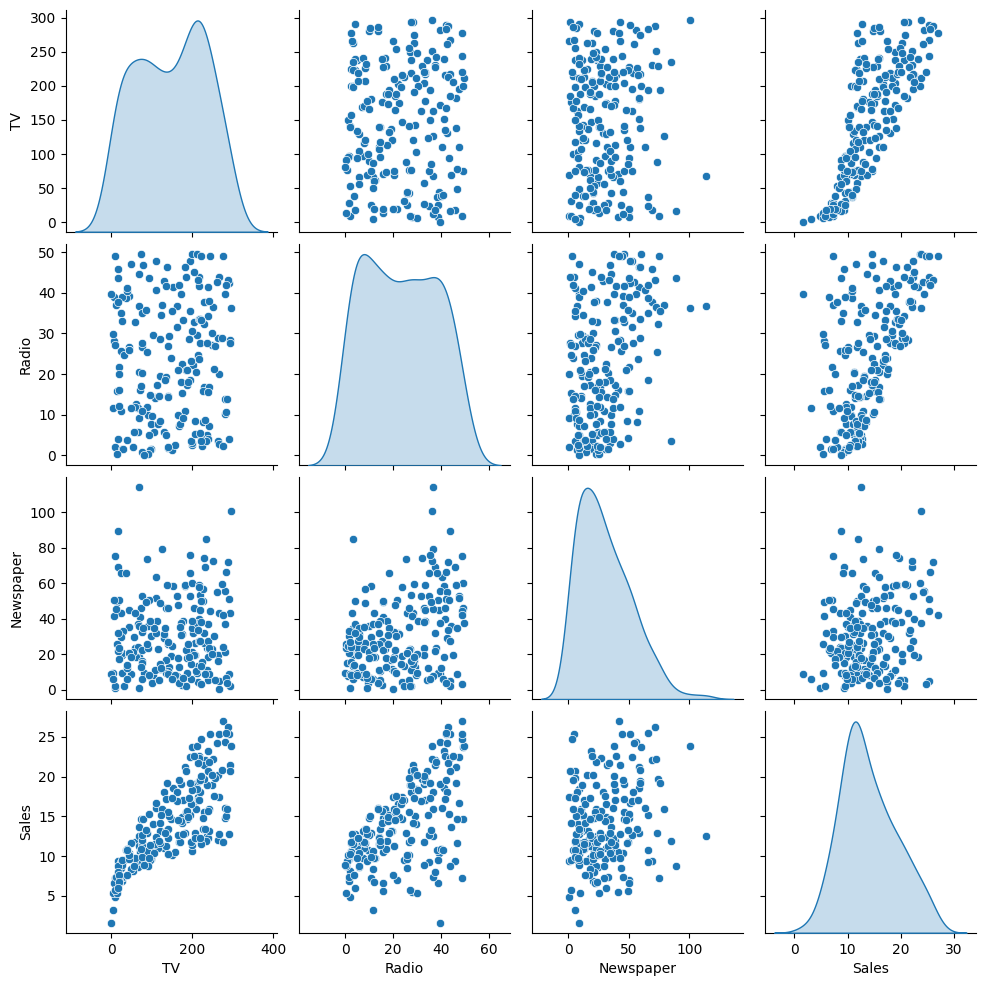

In [49]:
# creating a pair plot to visualize relationship between all the columns at once
sns.pairplot(df, diag_kind='kde')

##### AS we have to predict sales based on advertisement budget on TV, Radio, & Newspaper, we check correlation between variables and sales column
##### : High correaltion betweeen TV & Sales
##### : moderate correlation between Radio & Sales
##### : very low correlation between Newspaper & sales
##### : data seem to be sort of normally distributed

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

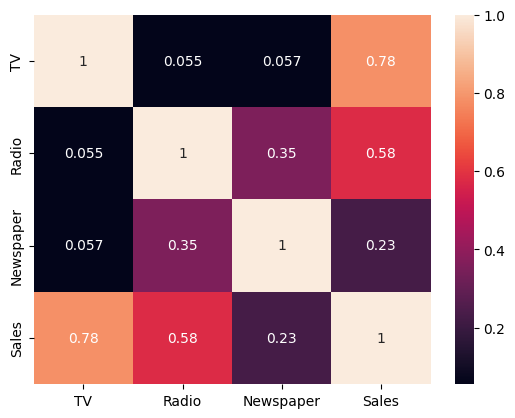

In [50]:
# checking for correlation 
print(df.corr())
sns.heatmap(df.corr(),annot=True)

### Multiple Linear Regression
##### Multiple linear regression allows us to build a linear relationship between mulitple feartures to estimate a target variable
##### Goal - To predict target variable based of features

In [51]:
# Splitting data into features (x) & target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# train test split of target & features
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
len(X_train), len(y_train), len(X_test),len(y_test)

(140, 140, 60, 60)

In [53]:
# creating a model instance from Linear Regression Class
linear_model = LinearRegression()

In [54]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# making predictions on test data using trained model
linear_predict = linear_model.predict(X_test)

# checking predicted values
linear_predict

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [56]:
# checking model performance by using various evaluation metrics
# (it compares actual y_test and predicted values)

linear_MAE = mean_absolute_error(y_test, linear_predict)
linear_MSE = mean_squared_error(y_test, linear_predict)
linear_RMSE = np.sqrt(mean_squared_error(y_test, linear_predict))
linear_R2 = r2_score(y_test, linear_predict)

print('Mean absolute error for linear regression', linear_MAE)
print('Mean squared error for linear regression', linear_MSE)
print('Root Mean squared error for linear regression', linear_RMSE)
print('Accuracy for linear regression', linear_R2 * 100)

Mean absolute error for linear regression 1.5116692224549086
Mean squared error for linear regression 3.79679723671522
Root Mean squared error for linear regression 1.9485372043446387
Accuracy for linear regression 86.09466508230368


### Polynomial Regression
##### polynomial regression is used to improve our regression model by considering higher order relationship between features

In [57]:
# Creating polynomial & fitting of features with degree 2
# here bias in the column of 1's as x to power 0=1, to eliminate bias we keep include bias = false
# as there are multiple features the dataset will also contain interaction between features (X1+X2, X2+X3, X1+X3)

x_poly = df.drop('Sales', axis=1)
y_poly = df['Sales']
poly_convert = PolynomialFeatures(degree=2, include_bias=False)
poly_transfrom = poly_convert.fit_transform(x_poly)

In [58]:
# shape of our new dataset is 200 rows by 9 columns
# columns are as follows(X1, X2, X3, X1 squared, X2 squared, X3 squared, X1+X2, X2+X3, X1+X3)

poly_transfrom.shape

(200, 9)

In [59]:
# creating a train test split on our polynomial data 
X_train, X_test, y_train, y_test = train_test_split(poly_transfrom, y_poly, test_size = 0.3, random_state = 42)

In [60]:
# creating a linear regression model instance from its class

poly_model = LinearRegression()

In [61]:
# training linear regression model on our polynomial data

poly_model.fit(X_train, y_train)

LinearRegression()

In [62]:
# making prediction on X test data using trained polynomial model
poly_predict = poly_model.predict(X_test)

In [63]:
poly_model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [64]:
poly_model.intercept_

4.7185216453427845

In [65]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

poly_MAE = mean_absolute_error(y_test, poly_predict)
poly_MSE = mean_squared_error(y_test, poly_predict)
poly_RMSE = np.sqrt(mean_squared_error(y_test, poly_predict)) # root mean sqaured error
poly_R2 = r2_score(y_test, poly_predict)

print('Mean absolute error for Polynomial regression ',poly_MAE)
print('Mean squared error for Polynomial regression ',poly_MSE)
print('Root Mean Squared error for Polynomail regression ',poly_RMSE)
print('Accuracy for Polynomial regression ',poly_R2*100)


Mean absolute error for Polynomial regression  0.590597483380802
Mean squared error for Polynomial regression  0.5231944949055376
Root Mean Squared error for Polynomail regression  0.7233218473857523
Accuracy for Polynomial regression  98.08386009966374


### Forest Tree Regressor


In [66]:
# Importing Random Forest Regressin from sklearn
from sklearn.ensemble import RandomForestRegressor

In [67]:
# Splitting data into features (x) & target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# train test split of target & features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
# making prediction
y_pred = rf_model.predict(X_test)

In [70]:
# converting mean squared errors
mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rsme)
print("R-squared: ", r2)

Mean Squared Error:  0.460882316666666
Root Mean Squared Error:  0.6788831391827801
R-squared:  0.9831207131396928


In [71]:
new_data = [[235.1,	36.8,	68.2]]
new_predictions = rf_model.predict(new_data)

c:\Users\vs\anaconda3\envs\hamropatro\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
import pickle

In [73]:
with open(r'C:\Users\vs\Desktop\sales_ml_project\model\linear_regression_model.pkl','wb') as file:
    pickle.dump(linear_model, file)

In [74]:
with open(r'C:\Users\vs\Desktop\sales_ml_project\model\polynomial_regression_model.pkl','wb') as file:
    pickle.dump(poly_model, file)

In [75]:
with open(r'C:\Users\vs\Desktop\sales_ml_project\model\random_forest_regression_model.pkl','wb') as file:
    pickle.dump(rf_model, file)